# MNISTデータの取得

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

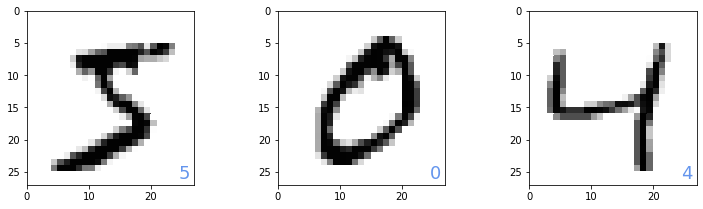

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]    # id番目の画像を取得
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
plt.show()

## データの整形

`keras.utils.np_utils.to_categorical()`で1ofK符号化法に変更する。

In [3]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 28 * 28)        # (A)
x_train = x_train.astype("float32")              # (B)
x_train = x_train / 255                          # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)  # (D)

x_test = x_test.reshape(10000, 28 * 28)
x_test = x_test.astype("float32")
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

### (A)
(60000 $\times$ 28 $\times$ 28)の配列を、(60000 $\times$ 784)の配列に変換

### (B)
入力を実数値で扱うために、int型からfloat型に変換

### (C)
255で割って、0～1の範囲に変換。

### (D)
1-of-K符号化

In [4]:
np.random.seed(1)
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adam

model = Sequential()
model.add(layers.Dense(16, input_dim=784, activation="relu"))     # layers[0]
model.add(layers.Dense(10, activation="softmax"))                 # layers[1]
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [5]:
import time

start = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1024,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")
print("Computation time:{0:.3f} sec".format(time.time() - start))

Epoch 1/10
59/59 [==============================] - 0s 6ms/step - loss: 2.2609 - accuracy: 0.1461 - val_loss: 2.1709 - val_accuracy: 0.2081
Epoch 2/10
59/59 [==============================] - 0s 4ms/step - loss: 2.0615 - accuracy: 0.2803 - val_loss: 1.9479 - val_accuracy: 0.3711
Epoch 3/10
59/59 [==============================] - 0s 4ms/step - loss: 1.8279 - accuracy: 0.4703 - val_loss: 1.7147 - val_accuracy: 0.5443
Epoch 4/10
59/59 [==============================] - 0s 4ms/step - loss: 1.6084 - accuracy: 0.5946 - val_loss: 1.5000 - val_accuracy: 0.6630
Epoch 5/10
59/59 [==============================] - 0s 4ms/step - loss: 1.3942 - accuracy: 0.7023 - val_loss: 1.2793 - val_accuracy: 0.7485
Epoch 6/10
59/59 [==============================] - 0s 4ms/step - loss: 1.2020 - accuracy: 0.7620 - val_loss: 1.1091 - val_accuracy: 0.7898
Epoch 7/10
59/59 [==============================] - 0s 4ms/step - loss: 1.0553 - accuracy: 0.7919 - val_loss: 0.9794 - val_accuracy: 0.8107
Epoch 8/10
59/59 [==

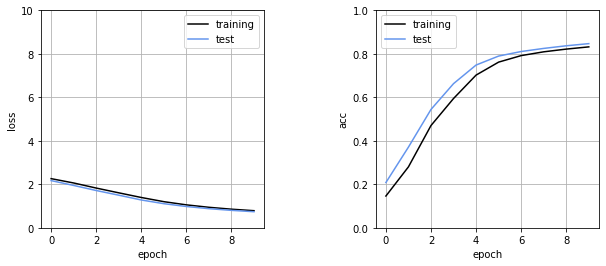

In [6]:
plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="training", color="#000000")
plt.plot(history.history["val_loss"], label="test", color="cornflowerblue")
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="training", color="#000000")
plt.plot(history.history["val_accuracy"], label="test", color="cornflowerblue")
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()

# テストデータを入力した時のモデルの出力結果

右下の数値はモデルの予測

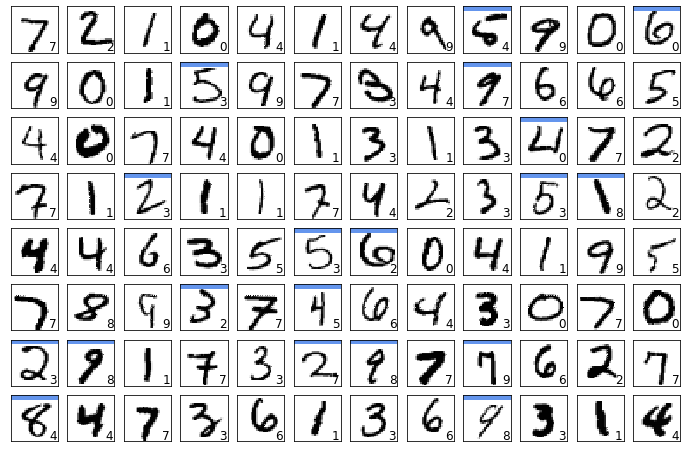

In [7]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)    # plt.text(x, y, "string", fontsize) x, yはテキストを描画する座標
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction()
plt.show()

# 重みパラメータの可視化

中間層の重みパラメータ: `model.layers[0].get_weights()[0]`<br>
バイアスパラメータ:     `model.layers[0].get_weights()[1]`<br>
<br>
出力層の重みパラメータ: `model.layers[1].get_weights()[0]`<br>
バイアスパラメータ:     `model.layers[1].get_weights()[1]`<br>

### 1層目の重みの可視化

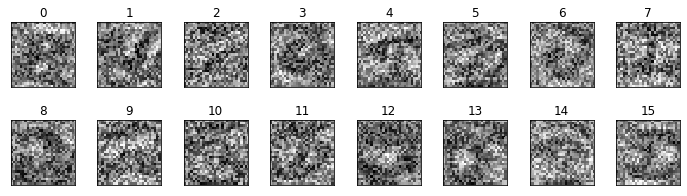

In [8]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

In [9]:
w.shape

(784, 16)

In [10]:
w1.shape

(28, 28)

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [13]:
from keras.applications.vgg16 import VGG16
from keras import layers
from keras.models import Model

def create_model( WIDTH, HEIGHT, class_num ):
    # モデルを定義
    input_tensor = layers.Input( shape=(HEIGHT, WIDTH, 3) )
    vgg = VGG16( include_top=False, input_tensor=input_tensor, weights=None, classes=class_num )
    x = vgg.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense( 2048, activation="relu" )(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense( 2048, activation="relu" )(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense( class_num, activation="softmax" )(x)
    return Model( inputs=vgg.inputs, outputs=x )

model = create_model(600, 400, 18)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 400, 600, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 600, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 600, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 300, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 300, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 300, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 150, 128)    